<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="120" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing & Upgrading Libraries**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)
  - **5.2** [**Data Cleaning**](#Section52)
  - **5.2** [**Data Post-profiling**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-profiling**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)
  - **7.2** [**Feature Scaling**](#Section72)
  - **7.2** [**PCA Transformation**](#Section73)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**K-Means Clustering**](#Section81)
  - **8.2** [**Agglomerative Clustering**](#Section82)
  - **8.3** [**Cluster Analysis**](#Section83)  

**9.** [**Conclusion**](#Section9)<br>

---
<a name=Section1 id=Section1></a>
# **1. Introduction**
---

- Segmenting customers is the **process** of **dividing** up mass **consumers** into **groups** with **similar** **needs** and **wants**. 

- It can **help** **companies** to **focus** on **marketing** efforts, so that **customer** **satisfaction** and **overall** **profit** could be achieved at higher rates. 

- **Segmentation** **exists** to **mitigate** the **inevitable** **problems** that evolve from a **"One size fits all"** approach. 

<center><img src = "https://www.segmentify.com/wp-content/uploads/2021/08/Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png"></center>

- Many **companies** **adopts** **different** **segmentation** **schemes**, that is often **develop** **best** **but** **static**. 

- Market **trends** **evolve** over time and **It** may **grow**, **decline** or **disappear** **within** certain **time** period due to number of **reasons** such as:

    -  Demographics trend, technological advancement, economic cycles, etc.

---
<a name=Section2 id=Section2></a>
# **2. Problem Statement**
---

- Customer **Personality Analysis** is a detailed analysis of a company’s **ideal customers**. 

- It helps a business to better **understand** its **customers** and makes it easier for them to **modify products** according to the **specific needs**.

- Customer personality analysis helps a business to modify its product based on its target **customers** from **different areas**. 

- A company can analyze **customer segment** **most likely** to **buy** the product and then market the product only on that particular segment.

<center><img src="https://spotonwifi.com/wp-content/uploads/2019/09/3-tips-segmentation-og.png"></center>

---
<a name=Section3 id=Section3></a>
# **3. Installing & Importing Libraries**
---

<a name=Section31 id=Section31></a>
### **3.1 Installing & Upgrading Libraries**

In [ ]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

<a name=Section32 id=Section32></a>
### **3.2 Importing Libraries**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # To perform data profiling
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # For numerical python operations
from datetime import datetime                                       # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
from matplotlib import pyplot as plt                                # To use matplotlib's pyplot interface
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns                                               # For attractive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name=Section4 id=Section4></a>
# **4. Data Acquisition & Wrangling**
---


| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 2240 | 927 | 206 KB |

<br>

| ID | Feature          |  Description                                    | # | ID | Feature             |  Description                                                       |
| -- | ---------------- | ----------------------------------------------- | - | -- | ------------------- | ------------------------------------------------------------------ |
| 1  | ID               |  Customer's unique identifier                   | # | 15 | MntGoldProds        |  Amount spent on gold in last 2 years                              |
| 2  | Year\_Birth      |  Customer's birth year                          | # | 16 | NumDealsPurchases   |  Number of purchases made with a discount                          |
| 3  | Education        |  Customer's education level                     | # | 17 | NumWebPurchases     |  Number of purchases made through the company's web site           |
| 4  | Marital\_Status  |  Customer's marital status                      | # | 18 | NumCatalogPurchases |  Number of purchases made using a catalogue                        |
| 5  | Income           |  Customer's yearly household income             | # | 19 | NumStorePurchases   |  Number of purchases made directly in stores                       |
| 6  | Kidhome          |  Number of children in customer's household     | # | 20 | NumWebVisitsMonth   |  Number of visits to company's web site in the last month          |
| 7  | Teenhome         |  Number of teenagers in customer's household    | # | 21 | AcceptedCmp1        |  1 if customer accepted the offer in the 1st campaign otherwise 0  |
| 8  | Dt\_Customer     |  Date of customer's enrollment with the company | # | 22 | AcceptedCmp2        |  1 if customer accepted the offer in the 2nd campaign otherwise 0  |
| 9  | Recency          |  Number of days since customer's last purchase  | # | 23 | AcceptedCmp3        |  1 if customer accepted the offer in the 3rd campaign otherwise 0  |
| 10 | MntWines         |  Amount spent on wine in last 2 years           | # | 24 | AcceptedCmp4        |  1 if customer accepted the offer in the 4th campaign otherwise 0  |
| 11 | MntFruits        |  Amount spent on fruits in last 2 years         | # | 25 | AcceptedCmp5        |  1 if customer accepted the offer in the 5th campaign otherwise 0  |
| 12 | MntMeatProducts  |  Amount spent on meat in last 2 years           | # | 26 | Complain            |  1 if customer complained in the last 2 years otherwise 0          |
| 13 | MntFishProducts  |  Amount spent on fish in last 2 years           | # | 27 | Response            |  1 if customer accepted the offer in the last campaign otherwise 0 |
| 14 | MntSweetProducts |  Amount spent on sweets in last 2 years         | # |    |                     |                                                                    |


In [2]:
filepath = '/content/drive/MyDrive/Notebook Builds/Customer Personality Analysis/marketing_campaign.csv'
data = pd.read_csv(filepath_or_buffer=filepath)
print('Data Shape:', data.shape)
data.head()

Data Shape: (2240, 27)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


<a name=Section41 id=Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<a name=Section42 id=Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observation:**

- We can observe that there are **null values** in the dataset but we have to **check for duplicates**.

- We can also observe that all the feature are having **correct datatype**.


<a name=Section5 id=Section5></a>

---
# **5. Data Pre-Processing**
---

<a name=Section51 id=Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates a **profile report** from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [ ]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

- The report shows that there are **overall 27 features**, out of which **15 are numeral**, **12 are categorical** types.

- There exist **24 missing values** (income) but **no duplicate values** are present.

- **ID** features is having **unique** values.

- **Dt_Customer** has a **high cardinality**: 663 distinct values

- Following set of features are having zero values:

| Id | Feature          |  Count |  Proportion | # | Id | Feature             |  Count |  Proportion |
| -- | ---------------- | ------ | ----------- | - | -- | ------------------- | ------ | ----------- |
| 1  | Recency          | 28     | 1.20%       | # | 5  | MntGoldProds        | 61     | 2.70%       |
| 2  | MntFruits        | 400    | 17.90%      | # | 6  | NumDealsPurchases   | 46     | 2.10%       |
| 3  | MntFishProducts  | 384    | 17.10%      | # | 7  | NumWebPurchases     | 49     | 2.20%       |
| 4  | MntSweetProducts | 419    | 18.70%      | # | 8  | NumCatalogPurchases | 586    | 26.20%      |

- Following set of features are having high correlation among each other:

| Id | Feature1            |  Feature 2           | Correlation | # | Id | Feature1         |  Feature 2         | Correlation |
| -- | ------------------- | -------------------- | ----------- | - | -- | ---------------- | ------------------ | ----------- |
| 1  | Income              |  Kidhome             | High        | # | 13 | MntFruits        |  MntMeatProducts   | High        |
| 2  | MntWines            |  Income              | High        | # | 14 | MntFishProducts  |  MntFruits         | High        |
| 3  | MntFruits           |  Income              | High        | # | 15 | MntSweetProducts |  MntFruits         | High        |
| 4  | MntMeatProducts     |  Income              | High        | # | 16 | NumWebPurchases  |  MntWines          | High        |
| 5  | MntFishProducts     |  Income              | High        | # | 17 | Kidhome          |  MntWines          | High        |
| 6  | MntSweetProducts    |  Income              | High        | # | 18 | Teenhome         |  NumDealsPurchases | High        |
| 7  | MntGoldProds        |  Income              | High        | # | 19 | MntSweetProducts |  Kidhome           | High        |
| 8  | NumWebPurchases     |  Income              | High        | # | 20 | MntGoldProds     |  MntWines          | High        |
| 9  | NumCatalogPurchases |  Income              | High        | # | 21 | AcceptedCmp4     |  MntWines          | High        |
| 10 | NumStorePurchases   |  Income              | High        | # | 22 | AcceptedCmp5     |  Income            | High        |
| 11 | NumWebVisitsMonth   |  Income              | High        | # | 23 | AcceptedCmp1     |  Income            | High        |
| 12 | Kidhome             |  NumCatalogPurchases | High        | # |    |                  |                    |             |

<a name=Section52 id=Section52></a>
### **5.2 Data Cleaning**

- In this section, we will perform the **cleaning** **operations** over the features using information from previous section.

In [3]:
# Replacing missing values with the median
data['Income'] = data['Income'].replace(np.nan, data['Income'].median())

<a name=Section53 id=Section53></a>
### **5.3 Data Post-Profiling**

- In this section, we will observe the changes after performing data pre-processing, if present.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observation:**

- We can observe that there are **no major changes** in the dataset.

<a name=Section6 id=Section6></a>

---
# **6. Exploratory Data Analysis**
---

- In this section, we will **analyze** the dataset to **summarize** their main **characteristics**, often using visuals.

- The **primary goal** is to **retrieve** a **maximum amount of information** from the dataset.

**Note:**

- In the real-time project, we never make use of code-based visualization because they are time-consuming.

- Instead, we make use of Business Intelligence tools such as Power BI or Tableau because they are quick to use.

- Before diving in further, let's create a few more feature from the existing ones and drop unnecessary ones.

In [4]:
# Age of the customer
data["Age"] = 2021-data["Year_Birth"]

# Total spendings on various items
data["Total_Spent"] = data["MntWines"] \
                    + data["MntFruits"] \
                    + data["MntMeatProducts"] \
                    + data["MntFishProducts"] \
                    + data["MntSweetProducts"] \
                    + data["MntGoldProds"]


# Deriving living situation by marital status"Alone"
marital_values = {"Married":"Partner", 
                  "Together":"Partner", 
                  "Absurd":"Alone", 
                  "Widow":"Alone", 
                  "YOLO":"Alone", 
                  "Divorced":"Alone", 
                  "Single":"Alone"}
data["Living_With"] = data["Marital_Status"].replace(marital_values)

# Total children living in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]

# Total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2}) + data["Children"]

# Extract Parenthood
data["Is_Parent"] = np.where(data.Children > 0, True, False)



# Segmenting education levels in three groups
education_groups = {"Basic":"Undergraduate", 
                    "2n Cycle":"Undergraduate", 
                    "Graduation":"Graduate", 
                    "Master":"Postgraduate", 
                    "PhD":"Postgraduate"}
data["Education"]=data["Education"].replace(education_groups)


# Modifyng clarity of feature names
names = {"MntWines": "Wines", 
         "MntFruits":"Fruits", 
         "MntMeatProducts":"Meat", 
         "MntFishProducts":"Fish", 
         "MntSweetProducts":"Sweets", 
         "MntGoldProds":"Gold"}
data=data.rename(columns=names)

# Dropping some of the redundant features
feature_list = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
data = data.drop(feature_list, axis=1)

**<h4>Question:** What is the proportion of Education, Response, Living_With, Childern, Family_Size, Is_Parent?</h4>

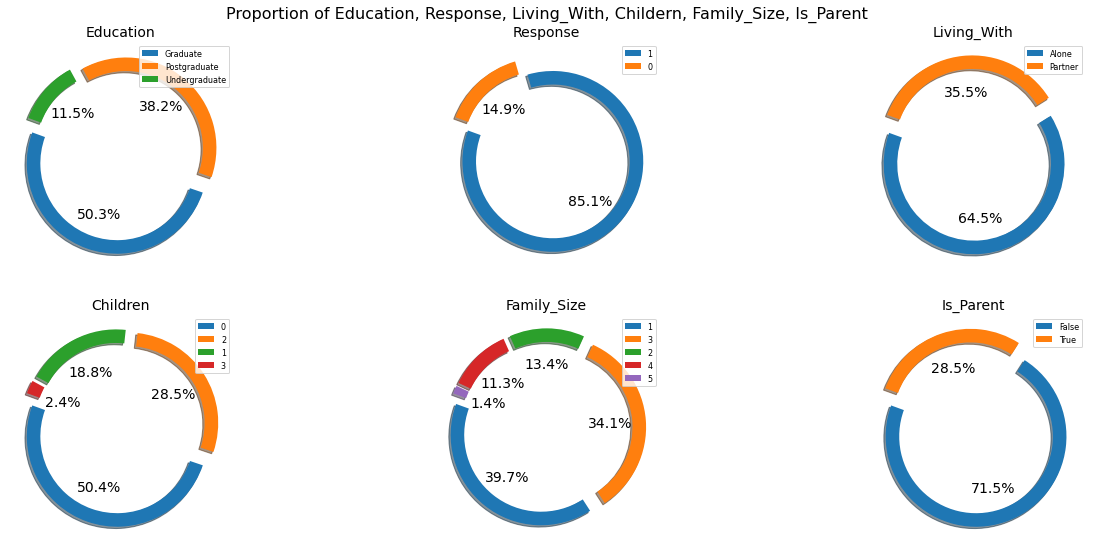

In [ ]:
# Initializing a list of features to plot
features = ['Education', 'Response', 'Living_With', 'Children', 'Family_Size', 'Is_Parent']

# Initializing figure and its axes with subplots having figure size 15 X 8 inches
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

# Generating subplots for each product
for ax, feature in zip(axes.flat, features):

    # Estimating explode space for the wedges of a donut
    unique_values = data[feature].unique()
    space = np.ones(len(unique_values)) / 10
    data[feature].value_counts().plot(kind='pie', 
                                      explode=space, 
                                      fontsize=14, 
                                      autopct='%3.1f%%', 
                                      wedgeprops=dict(width = 0.15), 
                                      shadow=True, 
                                      startangle=160, 
                                      figsize=[20, 8], 
                                      legend=True, 
                                      labels=None, 
                                      ax=ax)

    # Adding some cosmetics at axes level
    ax.set_ylabel(ylabel=None)
    ax.set_title(label=feature, size=14)
    ax.legend(labels=unique_values, loc=1, prop={'size': 8})

# Adding addition cosmetics using pyplot interface
plt.tight_layout(pad=3)
plt.suptitle(t='Proportion of Education, Response, Living_With, Childern, Family_Size, Is_Parent', size=16)
plt.show()

<a name=Section7 id=Section7></a>

---
# **7. Data Post-Processing**
---


<a name=Section71 id=Section71></a>
### **7.1 Feature Encoding**

- Let's transform our categorical feature to numeric by performing dummy encoding over them.

In [5]:
print('Old Data Shape:', data.shape)
data = pd.get_dummies(data=data, columns=['Education', 'Living_With', 'Is_Parent'])
print('New Data Shape:', data.shape)
data.head()

Old Data Shape: (2240, 29)
New Data Shape: (2240, 33)


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children,Family_Size,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Is_Parent_False,Is_Parent_True
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,1617,0,1,1,0,0,1,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,27,2,3,1,0,0,1,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,776,0,2,1,0,0,0,1,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,53,1,3,1,0,0,0,1,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,422,1,3,0,1,0,0,1,0,1


<a name=Section72 id=Section72></a>
### **7.2 Feature Scaling**

- Let's scale our feature to a standard scale using standard scaling.

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_frame = pd.DataFrame(data=scaled_data, columns=data.columns)
print('Scaled Data Shape:', scaled_frame.shape)
scaled_frame.head()

Scaled Data Shape: (2240, 33)


,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children,Family_Size,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner,Is_Parent_False,Is_Parent_True
0,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846,0.985345,1.679417,-1.264505,-1.759115,0.993769,-0.786446,-0.360002,1.346874,-1.346874,1.584605,-1.584605
1,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,1.396361,0.446548,0.993769,-0.786446,-0.360002,1.346874,-1.346874,-0.631072,0.631072
2,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,0.317643,0.282673,-1.264505,-0.656283,0.993769,-0.786446,-0.360002,-0.742460,0.742460,1.584605,-1.584605
3,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,0.065928,0.446548,0.993769,-0.786446,-0.360002,-0.742460,0.742460,-0.631072,0.631072
4,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,0.065928,0.446548,-1.006270,1.271543,-0.360002,-0.742460,0.742460,-0.631072,0.631072


<a name=Section73 id=Section73></a>
### **7.3 PCA Transformation**

- We can observe that our feature dimensions have increased.

- In order to cluster our data appropriately we need to appy PCA to reduce the dimensions of the data.

In [7]:
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_frame)
pca_frame = pd.DataFrame(data=pca_data, columns=['col1', 'col2', 'col3'])
print('Scaled Data Shape:', pca_frame.shape)
pca_frame.head()

Scaled Data Shape: (2240, 3)


,col1,col2,col3
0,5.219032,-0.880854,1.596460
1,-2.916797,-0.470375,1.440820
2,2.677139,-0.728755,-1.632588
3,-2.651271,-1.194298,-1.540508
4,-0.957768,0.736185,-0.805135


- Let's visualize our PCA transformed data on a 3-dimensional plane.

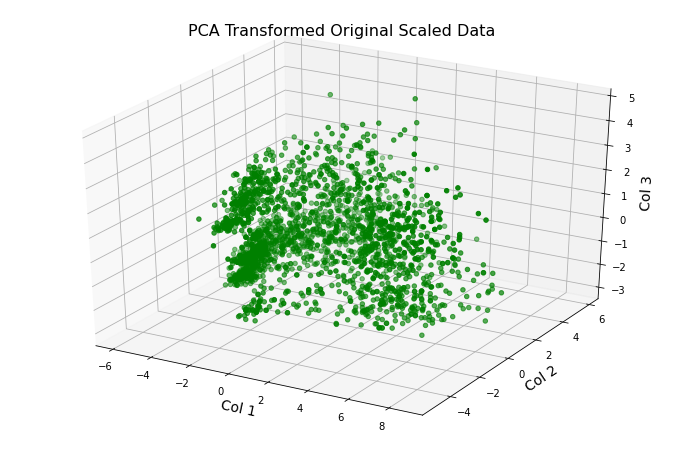

In [9]:
plt.figure(figsize=([12, 8]))
ax = plt.axes(projection='3d')
ax.scatter3D(xs=pca_frame['col1'], ys=pca_frame['col2'], zs=pca_frame['col3'], c='green', marker='o')
ax.set_xlabel(xlabel='Col 1', size=14)
ax.set_ylabel(ylabel='Col 2', size=14)
ax.set_zlabel(zlabel='Col 3', size=14)
ax.set_title('PCA Transformed Original Scaled Data', size=16)
plt.show()

<a name=Section8 id=Section8></a>

---
# **8. Model Development & Evaluation**
---


<a name=Section81 id=Section81></a>
### **8.1 K-Means Clustering**

In [11]:
# Have some patience, may take some time :)
inertia_vals = []
K_vals = [x for x in range(1, 16)]

for i in K_vals:
  k_model = KMeans(n_clusters=i, max_iter=500, random_state = 42)
  k_model.fit(pca_frame)
  inertia_vals.append(k_model.inertia_)
  print('Iteration', i, 'completed')

Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed
Iteration 5 completed
Iteration 6 completed
Iteration 7 completed
Iteration 8 completed
Iteration 9 completed
Iteration 10 completed
Iteration 11 completed
Iteration 12 completed
Iteration 13 completed
Iteration 14 completed
Iteration 15 completed


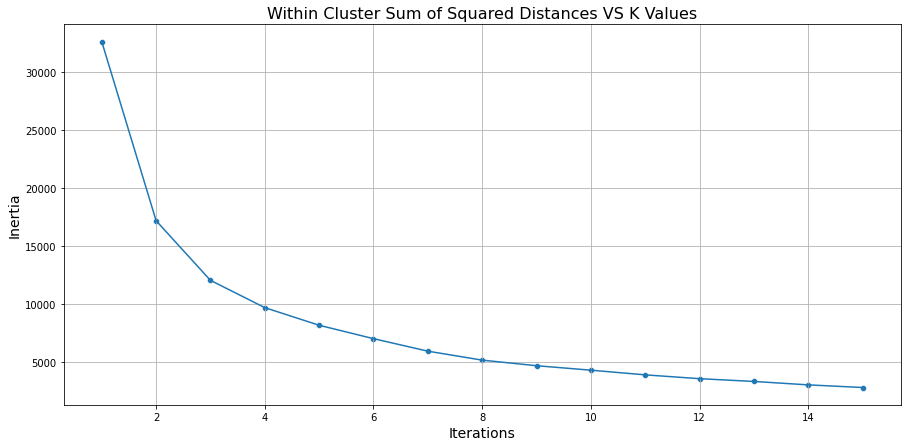

In [20]:
plt.figure(figsize=[15, 7])
sns.scatterplot(x=K_vals, y=inertia_vals)
sns.lineplot(x=K_vals, y=inertia_vals)
plt.xlabel(xlabel='Iterations', size=14)
plt.ylabel(ylabel='Inertia', size=14)
plt.title(label='Within Cluster Sum of Squared Distances VS K Values', size=16)
plt.grid(b=True)
plt.show()

**Observation:**

- We can observe that four will be an optimal number of clusters for this data.

In [21]:
kmeans = KMeans(n_clusters=4, max_iter=500, random_state=42)
kmeans.fit(pca_frame)
print('Within Sum of Square Variation (Inertia):', kmeans.inertia_)

Within Sum of Square Variation (Inertia): 9712.325024439491


<a name=Section82 id=Section82></a>
### **8.2 Agglomerative Clustering**

In [22]:
agg = AgglomerativeClustering(n_clusters=4)
predictions = agg.fit_predict(pca_frame)
pca_frame['Clusters'] = predictions
data['Clusters'] = predictions

<a name=Section83 id=Section83></a>
### **8.3 Cluster Analysis**

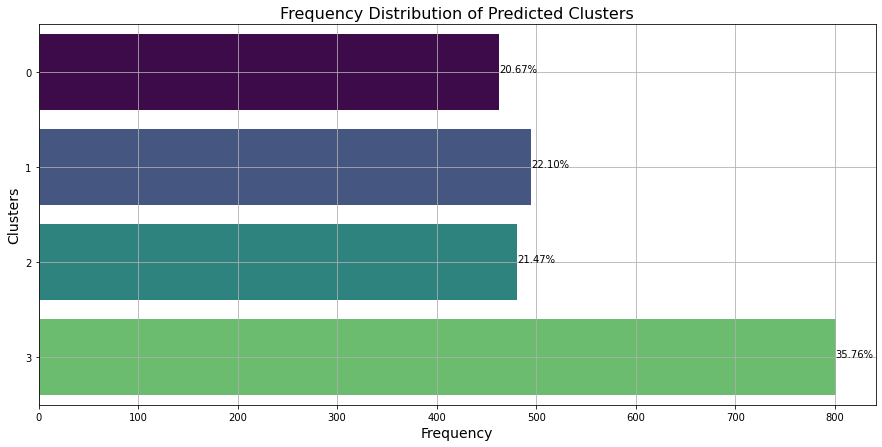

In [29]:
# Initialize a figure size of 15 X 7 inches
plt.figure(figsize=[15, 7])

# Initializing a list of colors for clusters
flatui = ["#440154", "#3B528B", "#21918C", "#5EC962"]

# Render a bar plot on the screen
ax = sns.countplot(y=data['Clusters'], palette=flatui)

# To add percentage alongside bars
total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100 * p.get_width() / total)
  x = p.get_x() + p.get_width()
  y = p.get_y() + p.get_height() / 2
  ax.annotate(percentage, (x, y))

# Adding some cosmetics
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Clusters', size=14)
plt.title(label='Frequency Distribution of Predicted Clusters', size=16)
plt.grid(b=True)

# Display the figure
plt.show()

- Let's visualize customers based on their spending and the income.

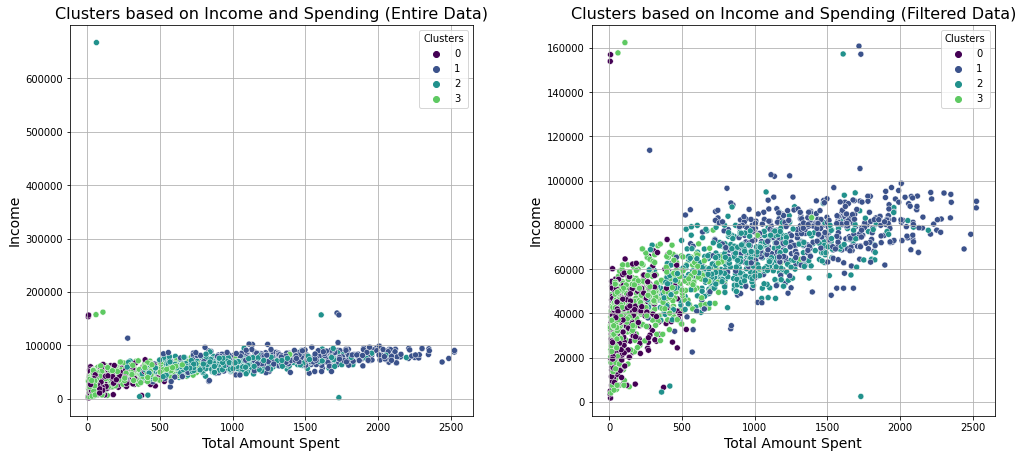

In [40]:
# Initializing figure and its axes with subplots having figure size 15 X 8 inches
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Initialzing a list of two data with and without filtering 
data_list = [data.copy(), data[data['Income'] < 666666.0]]
title_list = ['Entire Data', 'Filtered Data']

# Generating subplots for each product
for ax, _data, _title in zip(axes.flat, data_list, title_list):

    # Plot scatterplot concerning total spent and income
    sns.scatterplot(x=_data['Total_Spent'], 
                    y=_data['Income'], 
                    hue=_data['Clusters'], 
                    palette=flatui, 
                    ax=ax)

    # Adding some cosmetics
    ax.set_xlabel(xlabel='Total Amount Spent', size=14)
    ax.set_ylabel(ylabel='Income', size=14)
    ax.set_title(label='Clusters based on Income and Spending (' + _title + ')', size=16)
    ax.grid(b=True)

plt.tight_layout(pad=3)
plt.show()

**Observations:**

- **group 0:** high spending & low income

- **group 1:** high spending & high income

- **group 2:** high spending & average income

- **group 3:** high spending & low income

<a name=Section9 id=Section9></a>

---
# **9. Conclusion**
---

- We **analyzed** and understood the **behavior** of the data and performed manipulations accordingly.

- We **performed several transformations** over the marketing campaign data as per the requirement.

- We **analyzed** the several aspects of the features and **developed** **new features** out of the existing ones.

- We performed **several transformations** such as **encoding, scaling, and PCA** to aggregate data for model development.

- We **developed** two different types of models such as **K-Means** and **Agglomerative** and predicted the possible clusters.

- In the end, we **analyzed** the **behaviour** of predicted **clusters** concerning **spending** and **income** of the customers.